In [27]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.0.0-beta0'

### Hello World

In [17]:
hello = tf.constant("Hello Tensorflow 2")
print(type(hello))
print(hello)
print(hello.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(b'Hello Tensorflow 2', shape=(), dtype=string)
b'Hello Tensorflow 2'


In [23]:
# Operators (you can only add same-type tensors)
a = tf.constant(1.0)
b = tf.constant(1.2)

c = a+b

print(type(a))
print(type(b))
print(type(c))

print(c)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(2.2, shape=(), dtype=float32)


In [37]:
# Variables - no need to initialize vairbales anymore

W = tf.Variable(tf.random.normal([5,2], stddev=.1))
print(type(W))
print(W)
print(W.numpy())

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<tf.Variable 'Variable:0' shape=(5, 2) dtype=float32, numpy=
array([[-0.03659157,  0.03246316],
       [-0.01233154, -0.01778675],
       [ 0.04445628,  0.11602721],
       [-0.02429426,  0.03464315],
       [-0.02523409,  0.0412645 ]], dtype=float32)>
[[-0.03659157  0.03246316]
 [-0.01233154 -0.01778675]
 [ 0.04445628  0.11602721]
 [-0.02429426  0.03464315]
 [-0.02523409  0.0412645 ]]


In [40]:
# No need for placeholders and sessions anymore, functions do the trick 

"""
in Tensorflow 1.X
sess = tf.Session()
oper_out = sess.run(oper, feed_dict={x: data})
"""

data = np.random.rand(2, 5).astype('float32')

def multiply(x):
    return tf.matmul(x, W)

oper = multiply(data)
print(oper)

tf.Tensor(
[[-0.02861094  0.02792838]
 [-0.03657442  0.10774001]], shape=(2, 2), dtype=float32)


### MNIST

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
training, testing = tf.keras.datasets.mnist.load_data()
print("Number of training sample: %d" % training[0].shape[0])
print("Number of testing sample: %d" % testing[0].shape[0])

Number of training sample: 60000
Number of testing sample: 10000


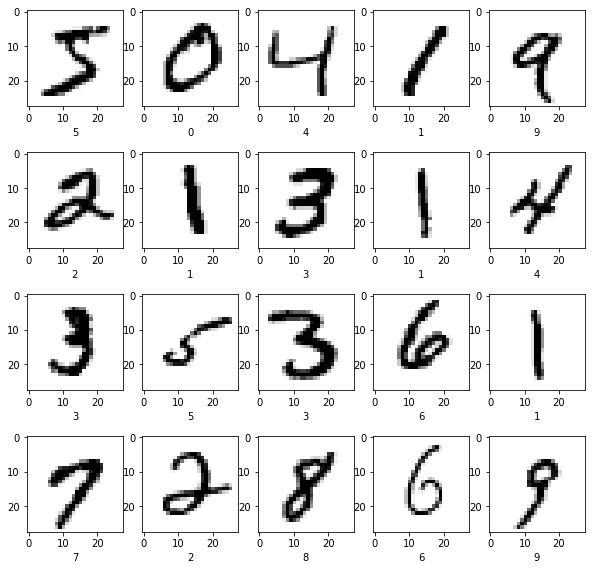

In [64]:
# Display the 20 random images of MNIST

AMOUNT = 20
LINES = 4
COLUMNS = 5

image = np.zeros((AMOUNT, 28, 28))
labels = np.zeros(AMOUNT)
for i in range(AMOUNT):
    image[i] = training[0][i].reshape(28, 28)
    labels[i] = training[1][i]
    
fig = plt.figure(figsize=(10,10))

for i in range(AMOUNT):
    ax = fig.add_subplot(LINES, COLUMNS, 1 + i)
    plt.imshow(image[i], cmap='binary')
    plt.sca(ax)
    plt.xlabel(int(labels[i]))
    

plt.show()
    

In [ ]:
# Creating efficient data input pipelines 

# https://adventuresinmachinelearning.com/tensorflow-dataset-tutorial/
dataset = tf.data.Dataset.batch(batch_size=BATCH_SIZE)
dataset = tf.data.Dataset.prefetch(buffer_size=PREFETCH_BUFFER_SIZE)